In [1]:
# Import dependencies:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import seaborn as sns

In [2]:
# Read data in train.csv file and store in a dataframe:

data = "Data/train.csv"
train_df = pd.read_csv(data)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Check which columns contain any missing values:

train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [4]:
# Check the percentage of missing values in the columns that have missing values:

proportion_missing = train_df.isnull().sum()/len(train_df)
proportion_missing = proportion_missing[proportion_missing > 0]
proportion_missing.sort_values(inplace=True)
proportion_missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

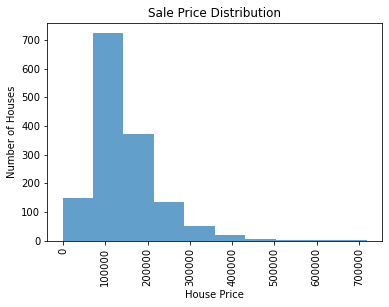

In [5]:
# Check the distribution of the sale prices (our target variable):

plt.hist(train_df.SalePrice, alpha=0.70, align="left")
plt.xlabel("House Price")
plt.ylabel("Number of Houses")
plt.xticks(rotation=90)
plt.title("Sale Price Distribution")
plt.show()

In [6]:
# Find quartiles of the sale price distribution:

sale_price = train_df["SalePrice"]

quartiles = sale_price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile range: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower quartile: 129975.0
Upper quartile: 214000.0
Interquartile range: 84025.0
Median: 163000.0 
Values below 3937.5 could be outliers.
Values above 340037.5 could be outliers.


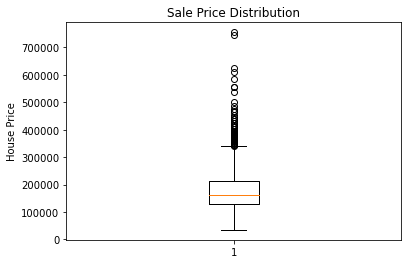

In [7]:
# Create a boxplot of the sale price distribution:

fig1, ax1 = plt.subplots()
ax1.set_title("Sale Price Distribution")
ax1.set_ylabel("House Price")
ax1.boxplot(sale_price)
plt.show()

In [8]:
# Separate data by categorical and numerical values:

numeric_data = train_df.select_dtypes(include=[np.number])
categorical_data = train_df.select_dtypes(exclude=[np.number])

print(f"Number of columns containing categorical data: {categorical_data.shape[1]}")
print(f"Number of columns containing numeric data: {numeric_data.shape[1]}")

Number of columns containing categorical data: 43
Number of columns containing numeric data: 38


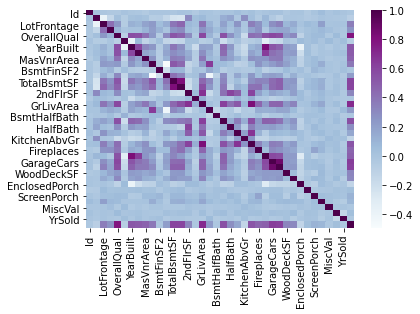

In [9]:
# For numeric data, create a correlation matrix that will help us visualize correlations between our features and target value:

corr = numeric_data.corr()
sns.heatmap(corr, cmap="BuPu")

In [10]:
# Print correlation values of the strongest positive correlations to the sale price:

print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



In [11]:
# Print correlation values of the strongest negative correlations to the sale price:

print (corr['SalePrice'].sort_values(ascending=False)[-10:])

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [ ]:
# Clean training dataset by replacing NA values:



In [28]:
# Combine train and test datasets so that they can both be encoded:

test_df = pd.read_csv("Data/test.csv")
test_df

combined_df = train_df.append(test_df)
combined_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [31]:
# Format data to prepare for encoding:

from sklearn.preprocessing import LabelEncoder

data = combined_df.values
X = data[:, 0:79]
y = data[:, 80]

In [33]:
# Loop through columns and use label encoder to encode data:


# For column in X:
    label_encoder = LabelEncoder()
    label_encoder.fit(y)
    encoded_data = label_encoder.transform(y)